[scipy stats docs](https://docs.scipy.org/doc/scipy/reference/stats.html)

[numpy stats docs](https://numpy.org/doc/stable/reference/routines.statistics.html)

[tutorial](https://www.tutorialspoint.com/scipy/scipy_stats.htm)

In [1]:
import scipy.stats as st
import numpy as np

import matplotlib.pyplot as plt

# Base classes

3 base classes, `rv_continuous`, `rv_discrete` and `rv_histogram`

## `rv_continuous`

- https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_continuous.html#scipy.stats.rv_continuous

In [2]:
class gaussian_gen(st.rv_continuous):

    "Gaussian distribution"

    def _pdf(self, x):


        return np.exp(-x**2 / 2.) / np.sqrt(2.0 * np.pi)
gaussian = gaussian_gen(name='gaussian')

In [3]:
gaussian.cdf(0)

0.4999999999999999

## `rv_discrete`

- https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_discrete.html#scipy.stats.rv_discrete

[0.1, 0.2, 0.3, 0.1, 0.1, 0.0, 0.2]
Probability mass:  [0.1, 0.2, 0.3, 0.1, 0.1, 0.0, 0.2]
Cumulative distribution:  [0.1, 0.30000000000000004, 0.6000000000000001, 0.7000000000000001, 0.8, 0.8, 1.0]



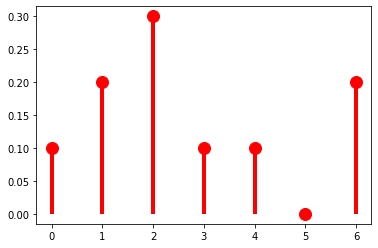

In [4]:
# Create discrete distribution
xk = np.arange(7)
pk = [0.1, 0.2, 0.3, 0.1, 0.1, 0.0, 0.2]
dist = st.rv_discrete(name='custm', values=(xk, pk))

print(pk)
print("Probability mass: ", [dist.pmf(x) for x in xk]) # probability of the value
print("Cumulative distribution: ", [dist.cdf(x) for x in xk])
print()
# Plot
fig, ax = plt.subplots(1, 1)
ax.plot(xk, dist.pmf(xk), 'ro', ms=12, mec='r') 
ax.vlines(xk, 0, dist.pmf(xk), colors='r', lw=4) 
plt.show()

In [5]:
dist.mean(), dist.std(), dist.var()

(2.7, 1.9519221295943132, 3.8099999999999987)

# Continuous distributions

## Uniform distribution

In [65]:
st.uniform.ppf(0.99)

0.99

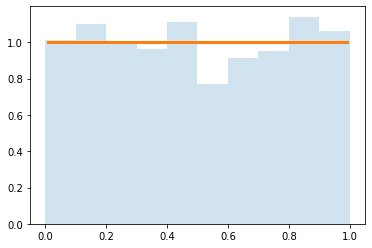

In [92]:
num_samples = 1000
x = np.linspace(st.uniform.ppf(0.01), st.uniform.ppf(0.99), 100)
p = st.uniform.pdf(x) # everything has prob 1
samples = [st.uniform.rvs() for _ in range(num_samples)] # sample 

plt.hist(samples, density=True, alpha = .2)
plt.plot(x, p, linewidth = 3)
plt.show()



## Gaussian

In [70]:
st.norm.ppf(0.01), st.norm.ppf(0.99)

(-2.3263478740408408, 2.3263478740408408)

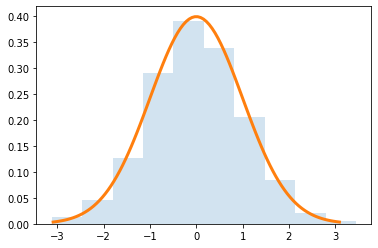

In [93]:
x = np.linspace(st.norm.ppf(0.001), st.norm.ppf(0.999), 100)
y = st.norm.pdf(x)
samples = [st.norm.rvs() for _ in range(num_samples)] # sample 
plt.hist(samples, density=True, alpha = .2)
plt.plot(x, y, linewidth = 3)
plt.show()


# Discrete distributions

## Bernoulli

Probability mass function:

$$f(k) = \begin{cases}
1 - p & \text{ if } k = 0 \\
p & \text{ if } k = 1
\end{cases}$$
for $k \in {0, 1}, 0 \leq p \leq 1$

In [102]:
p = .3
mean, var = st.bernoulli.stats(p, moments = 'mv')
print(f"{mean = }\n{var = }")

mean = array(0.3)
var = array(0.21)


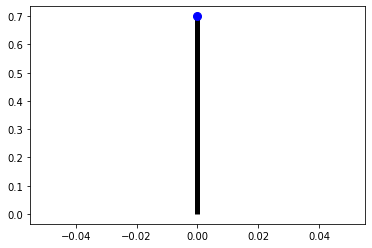

In [134]:
x = np.arange(st.bernoulli.ppf(0.01, p), st.bernoulli.ppf(0.99, p))
y = st.bernoulli.pmf(x, p)
samples = [st.bernoulli.rvs(p) for _ in range(num_samples)] # sample 
plt.plot(x, y, 'bo', ms = 8)
plt.vlines(x, 0, y, color = 'k', linestyles = '-', lw = 5)
#plt.plot(x, y, linewidth = 3)
plt.show()

## Geometric

Probability mass function:
$$f(k) = (1 - p)^{k-1}p$$
for $k \geq 1, 0 \leq p \leq 1$. $p$ is the probability of a single success

In [147]:
p = .5
mean, var = st.geom.stats(p, moments = 'mv')
print(f"{mean = }\n{var = }")

mean = array(2.)
var = array(2.)


In [ ]:
x = np.arange(st.bernoulli.ppf(0.01, p), st.bernoulli.ppf(0.99, p))
y = st.bernoulli.pmf(x, p)
samples = [st.bernoulli.rvs(p) for _ in range(num_samples)] # sample 
plt.plot(x, y, 'bo', ms = 8)
plt.vlines(x, 0, y, color = 'k', linestyles = '-', lw = 5)
#plt.plot(x, y, linewidth = 3)
plt.show()

## Binomial

## Poisson